## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
#建立你的神經網路
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
#設定超參數
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
#撰寫你的訓練流程並將結果用 dictionary 紀錄
results = {}

for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %d" % (bs))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bs, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "bs-%d" % bs
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BATCH_SIZE = 2
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch

50000/50000 [==============================] - 557s 11ms/step - loss: 2.2569 - accuracy: 0.1501 - val_loss: 407.3833 - val_accuracy: 0.1730
Epoch 45/50
50000/50000 [==============================] - 557s 11ms/step - loss: 2.2622 - accuracy: 0.1510 - val_loss: 998.5407 - val_accuracy: 0.1718
Epoch 46/50
50000/50000 [==============================] - 556s 11ms/step - loss: 2.2609 - accuracy: 0.1508 - val_loss: 1652.1809 - val_accuracy: 0.1729
Epoch 47/50
50000/50000 [==============================] - 561s 11ms/step - loss: 2.2553 - accuracy: 0.1532 - val_loss: 556.1219 - val_accuracy: 0.1886
Epoch 48/50
50000/50000 [==============================] - 558s 11ms/step - loss: 2.2580 - accuracy: 0.1519 - val_loss: 1489.4077 - val_accuracy: 0.1776
Epoch 49/50
50000/50000 [==============================] - 557s 11ms/step - loss: 2.2530 - accuracy: 0.1514 - val_loss: 1135.9840 - val_accuracy: 0.1493
Epoch 50/50
50000/50000 [==============================] - 557s 11ms/step - loss: 2.2525 - accura

50000/50000 [==============================] - 80s 2ms/step - loss: 1.1584 - accuracy: 0.5884 - val_loss: 1.3609 - val_accuracy: 0.5253
Epoch 40/50
50000/50000 [==============================] - 80s 2ms/step - loss: 1.1564 - accuracy: 0.5897 - val_loss: 1.3682 - val_accuracy: 0.5213
Epoch 41/50
50000/50000 [==============================] - 80s 2ms/step - loss: 1.1513 - accuracy: 0.5917 - val_loss: 1.3477 - val_accuracy: 0.5311
Epoch 42/50
50000/50000 [==============================] - 80s 2ms/step - loss: 1.1429 - accuracy: 0.5956 - val_loss: 1.3518 - val_accuracy: 0.5329
Epoch 43/50
50000/50000 [==============================] - 80s 2ms/step - loss: 1.1381 - accuracy: 0.5986 - val_loss: 1.3807 - val_accuracy: 0.5154
Epoch 44/50
50000/50000 [==============================] - 80s 2ms/step - loss: 1.1300 - accuracy: 0.6002 - val_loss: 1.3412 - val_accuracy: 0.5300
Epoch 45/50
50000/50000 [==============================] - 80s 2ms/step - loss: 1.1257 - accuracy: 0.5996 - val_loss: 1.3696

50000/50000 [==============================] - 47s 943us/step - loss: 0.9175 - accuracy: 0.6723 - val_loss: 1.4177 - val_accuracy: 0.5226
Epoch 34/50
50000/50000 [==============================] - 47s 945us/step - loss: 0.9001 - accuracy: 0.6783 - val_loss: 1.4978 - val_accuracy: 0.5026
Epoch 35/50
50000/50000 [==============================] - 47s 944us/step - loss: 0.8933 - accuracy: 0.6813 - val_loss: 1.5302 - val_accuracy: 0.4990
Epoch 36/50
50000/50000 [==============================] - 47s 943us/step - loss: 0.8979 - accuracy: 0.6786 - val_loss: 1.5352 - val_accuracy: 0.4906
Epoch 37/50
50000/50000 [==============================] - 47s 945us/step - loss: 0.8815 - accuracy: 0.6845 - val_loss: 1.6246 - val_accuracy: 0.4876
Epoch 38/50
50000/50000 [==============================] - 47s 945us/step - loss: 0.8665 - accuracy: 0.6909 - val_loss: 1.5390 - val_accuracy: 0.4983
Epoch 39/50
50000/50000 [==============================] - 47s 944us/step - loss: 0.8619 - accuracy: 0.6919 - va

Epoch 28/50
50000/50000 [==============================] - 22s 448us/step - loss: 0.5717 - accuracy: 0.8003 - val_loss: 1.9770 - val_accuracy: 0.4539
Epoch 29/50
50000/50000 [==============================] - 22s 450us/step - loss: 0.5556 - accuracy: 0.8077 - val_loss: 2.1190 - val_accuracy: 0.4442
Epoch 30/50
50000/50000 [==============================] - 23s 451us/step - loss: 0.5362 - accuracy: 0.8132 - val_loss: 1.8644 - val_accuracy: 0.4748
Epoch 31/50
50000/50000 [==============================] - 22s 448us/step - loss: 0.5202 - accuracy: 0.8179 - val_loss: 2.2261 - val_accuracy: 0.4461
Epoch 32/50
50000/50000 [==============================] - 23s 458us/step - loss: 0.5036 - accuracy: 0.8254 - val_loss: 2.0363 - val_accuracy: 0.4545
Epoch 33/50
50000/50000 [==============================] - 22s 447us/step - loss: 0.4800 - accuracy: 0.8337 - val_loss: 2.0206 - val_accuracy: 0.4654
Epoch 34/50
50000/50000 [==============================] - 23s 456us/step - loss: 0.4629 - accuracy:

50000/50000 [==============================] - 18s 365us/step - loss: 0.7070 - accuracy: 0.7611 - val_loss: 1.6385 - val_accuracy: 0.4782
Epoch 23/50
50000/50000 [==============================] - 18s 364us/step - loss: 0.6772 - accuracy: 0.7703 - val_loss: 1.6859 - val_accuracy: 0.4740
Epoch 24/50
50000/50000 [==============================] - 18s 362us/step - loss: 0.6493 - accuracy: 0.7814 - val_loss: 1.7164 - val_accuracy: 0.4646
Epoch 25/50
50000/50000 [==============================] - 18s 361us/step - loss: 0.6209 - accuracy: 0.7921 - val_loss: 1.6994 - val_accuracy: 0.4769
Epoch 26/50
50000/50000 [==============================] - 18s 361us/step - loss: 0.5974 - accuracy: 0.8000 - val_loss: 1.7966 - val_accuracy: 0.4679
Epoch 27/50
50000/50000 [==============================] - 18s 360us/step - loss: 0.5698 - accuracy: 0.8105 - val_loss: 1.8479 - val_accuracy: 0.4602
Epoch 28/50
50000/50000 [==============================] - 18s 360us/step - loss: 0.5437 - accuracy: 0.8209 - va

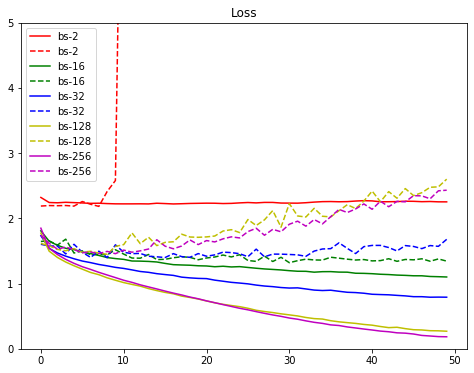

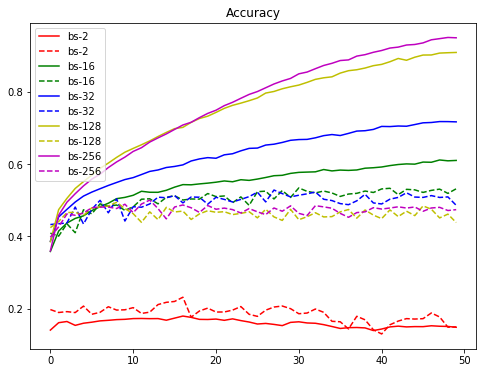

In [8]:
#將結果繪出

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## BN 放在 Activation 之前

In [9]:
from keras.layers import BatchNormalization
from keras.layers import Activation

def build_mlp_bn_before_act(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
results = {}

for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %d" % (bs))
    model = build_mlp_bn_before_act(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bs, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "bs-%d" % bs
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BATCH_SIZE = 2
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)   

50000/50000 [==============================] - 557s 11ms/step - loss: 2.2810 - accuracy: 0.1457 - val_loss: 2.2792 - val_accuracy: 0.1287
Epoch 43/50
50000/50000 [==============================] - 566s 11ms/step - loss: 2.2825 - accuracy: 0.1372 - val_loss: 2.2654 - val_accuracy: 0.1473
Epoch 44/50
50000/50000 [==============================] - 566s 11ms/step - loss: 2.2718 - accuracy: 0.1529 - val_loss: 2.2616 - val_accuracy: 0.1513
Epoch 45/50
50000/50000 [==============================] - 557s 11ms/step - loss: 2.2705 - accuracy: 0.1530 - val_loss: 2.2602 - val_accuracy: 0.1631
Epoch 46/50
50000/50000 [==============================] - 557s 11ms/step - loss: 2.2736 - accuracy: 0.1396 - val_loss: 2.2705 - val_accuracy: 0.1416
Epoch 47/50
50000/50000 [==============================] - 558s 11ms/step - loss: 2.2774 - accuracy: 0.1308 - val_loss: 2.2673 - val_accuracy: 0.1163
Epoch 48/50
50000/50000 [==============================] - 557s 11ms/step - loss: 2.2721 - accuracy: 0.1376 - va

50000/50000 [==============================] - 81s 2ms/step - loss: 0.6440 - accuracy: 0.7710 - val_loss: 1.6674 - val_accuracy: 0.5079
Epoch 35/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.6284 - accuracy: 0.7783 - val_loss: 1.7323 - val_accuracy: 0.5031
Epoch 36/50
50000/50000 [==============================] - 80s 2ms/step - loss: 0.6240 - accuracy: 0.7798 - val_loss: 1.6279 - val_accuracy: 0.5216
Epoch 37/50
50000/50000 [==============================] - 80s 2ms/step - loss: 0.6106 - accuracy: 0.7854 - val_loss: 1.6563 - val_accuracy: 0.5139
Epoch 38/50
50000/50000 [==============================] - 80s 2ms/step - loss: 0.5955 - accuracy: 0.7882 - val_loss: 1.6770 - val_accuracy: 0.5230
Epoch 39/50
50000/50000 [==============================] - 80s 2ms/step - loss: 0.5865 - accuracy: 0.7951 - val_loss: 1.8250 - val_accuracy: 0.5043
Epoch 40/50
50000/50000 [==============================] - 80s 2ms/step - loss: 0.5751 - accuracy: 0.7979 - val_loss: 1.7453

50000/50000 [==============================] - 48s 952us/step - loss: 0.4797 - accuracy: 0.8297 - val_loss: 2.0499 - val_accuracy: 0.4706
Epoch 27/50
50000/50000 [==============================] - 47s 948us/step - loss: 0.4552 - accuracy: 0.8385 - val_loss: 2.0874 - val_accuracy: 0.4757
Epoch 28/50
50000/50000 [==============================] - 47s 948us/step - loss: 0.4366 - accuracy: 0.8453 - val_loss: 2.0331 - val_accuracy: 0.4904
Epoch 29/50
50000/50000 [==============================] - 47s 949us/step - loss: 0.4226 - accuracy: 0.8514 - val_loss: 2.1392 - val_accuracy: 0.4958
Epoch 30/50
50000/50000 [==============================] - 48s 951us/step - loss: 0.4116 - accuracy: 0.8527 - val_loss: 1.9251 - val_accuracy: 0.5056
Epoch 31/50
50000/50000 [==============================] - 47s 949us/step - loss: 0.3914 - accuracy: 0.8630 - val_loss: 2.3063 - val_accuracy: 0.4786
Epoch 32/50
50000/50000 [==============================] - 47s 949us/step - loss: 0.3746 - accuracy: 0.8670 - va

50000/50000 [==============================] - 23s 456us/step - loss: 0.4353 - accuracy: 0.8613 - val_loss: 2.0249 - val_accuracy: 0.4544
Epoch 19/50
50000/50000 [==============================] - 23s 451us/step - loss: 0.3986 - accuracy: 0.8721 - val_loss: 2.1488 - val_accuracy: 0.4458
Epoch 20/50
50000/50000 [==============================] - 23s 459us/step - loss: 0.3645 - accuracy: 0.8845 - val_loss: 2.2040 - val_accuracy: 0.4417
Epoch 21/50
50000/50000 [==============================] - 23s 452us/step - loss: 0.3401 - accuracy: 0.8925 - val_loss: 2.0420 - val_accuracy: 0.4519
Epoch 22/50
50000/50000 [==============================] - 23s 453us/step - loss: 0.3066 - accuracy: 0.9050 - val_loss: 2.5561 - val_accuracy: 0.4143
Epoch 23/50
50000/50000 [==============================] - 23s 458us/step - loss: 0.2742 - accuracy: 0.9163 - val_loss: 2.1196 - val_accuracy: 0.4815
Epoch 24/50
50000/50000 [==============================] - 23s 451us/step - loss: 0.2540 - accuracy: 0.9218 - va

50000/50000 [==============================] - 18s 363us/step - loss: 1.0330 - accuracy: 0.6473 - val_loss: 1.4829 - val_accuracy: 0.4786
Epoch 10/50
50000/50000 [==============================] - 18s 363us/step - loss: 0.9794 - accuracy: 0.6668 - val_loss: 1.4720 - val_accuracy: 0.4904
Epoch 11/50
50000/50000 [==============================] - 18s 369us/step - loss: 0.9260 - accuracy: 0.6869 - val_loss: 1.4570 - val_accuracy: 0.4940
Epoch 12/50
50000/50000 [==============================] - 18s 365us/step - loss: 0.8737 - accuracy: 0.7084 - val_loss: 1.5117 - val_accuracy: 0.4886
Epoch 13/50
50000/50000 [==============================] - 18s 364us/step - loss: 0.8238 - accuracy: 0.7267 - val_loss: 1.5299 - val_accuracy: 0.4760
Epoch 14/50
50000/50000 [==============================] - 18s 365us/step - loss: 0.7737 - accuracy: 0.7461 - val_loss: 1.5886 - val_accuracy: 0.4776
Epoch 15/50
50000/50000 [==============================] - 18s 364us/step - loss: 0.7284 - accuracy: 0.7625 - va

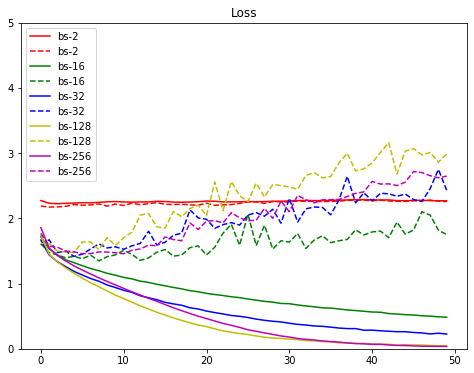

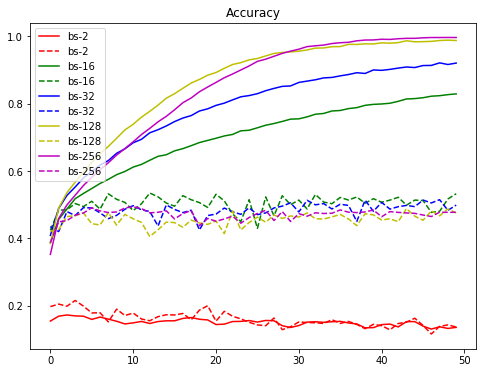

In [11]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## BN 放在 Input Layer 後

In [12]:
def build_mlp_bn_after_input(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        x = keras.layers.Dense(units=n_units, 
                               activation="relu", 
                               name="hidden_layer"+str(i+1))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
results = {}

for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %d" % (bs))
    model = build_mlp_bn_after_input(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bs, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "bs-%d" % bs
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BATCH_SIZE = 2
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
______________

50000/50000 [==============================] - 716s 14ms/step - loss: 1.9381 - accuracy: 0.3127 - val_loss: 1.6667 - val_accuracy: 0.4226
Epoch 47/50
50000/50000 [==============================] - 712s 14ms/step - loss: 1.9288 - accuracy: 0.3140 - val_loss: 1.6772 - val_accuracy: 0.4217
Epoch 48/50
50000/50000 [==============================] - 681s 14ms/step - loss: 1.9295 - accuracy: 0.3153 - val_loss: 1.6783 - val_accuracy: 0.4318
Epoch 49/50
50000/50000 [==============================] - 668s 13ms/step - loss: 1.9209 - accuracy: 0.3164 - val_loss: 1.6529 - val_accuracy: 0.4442
Epoch 50/50
50000/50000 [==============================] - 1211s 24ms/step - loss: 1.9192 - accuracy: 0.3218 - val_loss: 1.7001 - val_accuracy: 0.4296
Experiment with BATCH_SIZE = 16
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
______________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 93s 2ms/step - loss: 1.6758 - accuracy: 0.4077 - val_loss: 1.4858 - val_accuracy: 0.4762
Epoch 2/50
50000/50000 [==============================] - 92s 2ms/step - loss: 1.4426 - accuracy: 0.4886 - val_loss: 1.3871 - val_accuracy: 0.5083
Epoch 3/50
50000/50000 [==============================] - 92s 2ms/step - loss: 1.3396 - accuracy: 0.5287 - val_loss: 1.3679 - val_accuracy: 0.5167
Epoch 4/50
50000/50000 [==============================] - 91s 2ms/step - loss: 1.2491 - accuracy: 0.5597 - val_loss: 1.3705 - val_accuracy: 0.5170
Epoch 5/50
50000/50000 [==============================] - 89s 2ms/step - loss: 1.1744 - accuracy: 0.5871 - val_loss: 1.3311 - val_accuracy: 0.5361
Epoch 6/50
50000/50000 [==============================] - 72s 1ms/step - loss: 1.1121 - accuracy: 0.6080 - val_loss: 1.3561 - val_accuracy: 0.5276
Epoch 7/50
50000/50000 [==============================] - 91s 2ms/st

Epoch 7/50
50000/50000 [==============================] - 30s 608us/step - loss: 1.0767 - accuracy: 0.6299 - val_loss: 1.3626 - val_accuracy: 0.5268
Epoch 8/50
50000/50000 [==============================] - 30s 599us/step - loss: 1.0167 - accuracy: 0.6505 - val_loss: 1.3685 - val_accuracy: 0.5285
Epoch 9/50
50000/50000 [==============================] - 30s 598us/step - loss: 0.9539 - accuracy: 0.6729 - val_loss: 1.3798 - val_accuracy: 0.5321
Epoch 10/50
50000/50000 [==============================] - 30s 606us/step - loss: 0.8960 - accuracy: 0.6935 - val_loss: 1.4042 - val_accuracy: 0.5302
Epoch 11/50
50000/50000 [==============================] - 30s 606us/step - loss: 0.8400 - accuracy: 0.7121 - val_loss: 1.4121 - val_accuracy: 0.5296
Epoch 12/50
50000/50000 [==============================] - 30s 603us/step - loss: 0.7886 - accuracy: 0.7297 - val_loss: 1.4416 - val_accuracy: 0.5331
Epoch 13/50
50000/50000 [==============================] - 30s 602us/step - loss: 0.7328 - accuracy: 0.

50000/50000 [==============================] - 26s 515us/step - loss: 1.4912 - accuracy: 0.4790 - val_loss: 1.5037 - val_accuracy: 0.4727
Epoch 4/50
50000/50000 [==============================] - 25s 499us/step - loss: 1.4081 - accuracy: 0.5093 - val_loss: 1.4600 - val_accuracy: 0.4811
Epoch 5/50
50000/50000 [==============================] - 25s 499us/step - loss: 1.3375 - accuracy: 0.5370 - val_loss: 1.4353 - val_accuracy: 0.4897
Epoch 6/50
50000/50000 [==============================] - 25s 497us/step - loss: 1.2807 - accuracy: 0.5587 - val_loss: 1.4122 - val_accuracy: 0.5057
Epoch 7/50
50000/50000 [==============================] - 25s 504us/step - loss: 1.2272 - accuracy: 0.5775 - val_loss: 1.3981 - val_accuracy: 0.5087
Epoch 8/50
50000/50000 [==============================] - 25s 494us/step - loss: 1.1776 - accuracy: 0.5965 - val_loss: 1.3805 - val_accuracy: 0.5157
Epoch 9/50
50000/50000 [==============================] - 25s 502us/step - loss: 1.1285 - accuracy: 0.6127 - val_loss

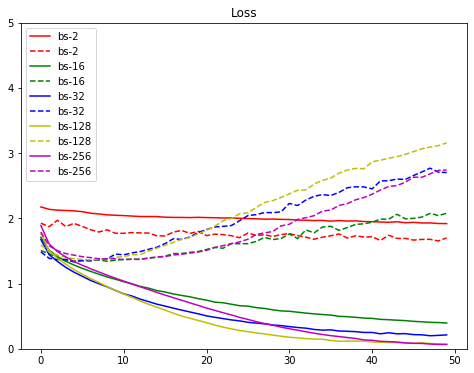

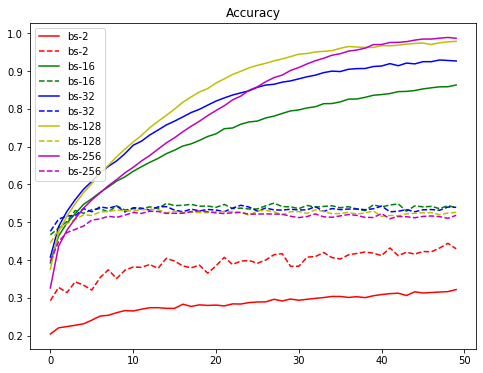

In [14]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()